# Assignment 3

### Task 1 - Simulation

### Task 2 - Predicting Power with SAR(2)

### Task 3 - Box heating with ARX

The final part is about identifying a suitable ARX model for predicting the hourly heating of a test box (a small building). The box has a window in the south facing wall.

In an experiment times series were recorded of the variables:
- $P_h$ (Ph in data) the heat from electrical heaters (W).
- $T_{\text{delta}}$ (Tdelta in data) the difference between the internal and external temperature (◦C)
- $G_v$ (Gv in data) the vertical solar radiation onto the box side with a window (W/m2)

The data consists of average hourly values – in total 231 hours. It’s available in the ```box_data_60min.csv``` file.

In the experiment the internal air temperature was kept constant with a thermostatic control of the heating – hence the heating change depending on the weather conditions.

The objective is to find a suitable model, which makes good predictions of the heating.

Lags have been generated and included in the data with a naming syntax such that, e.g.: Ph.l1 is the heating lagged one step, Ph.l2 is heating lagged two steps and so fourth.

##### 3.1

In [1]:
import pandas as pd

df = pd.read_csv("./../data/box_data_60min.csv")
df.tdate = pd.to_datetime(df.tdate)
df.set_index(df.tdate, inplace=True)
# thour starts at 19!?! --> re-index
df['thour'] = range(1,len(df)+1)

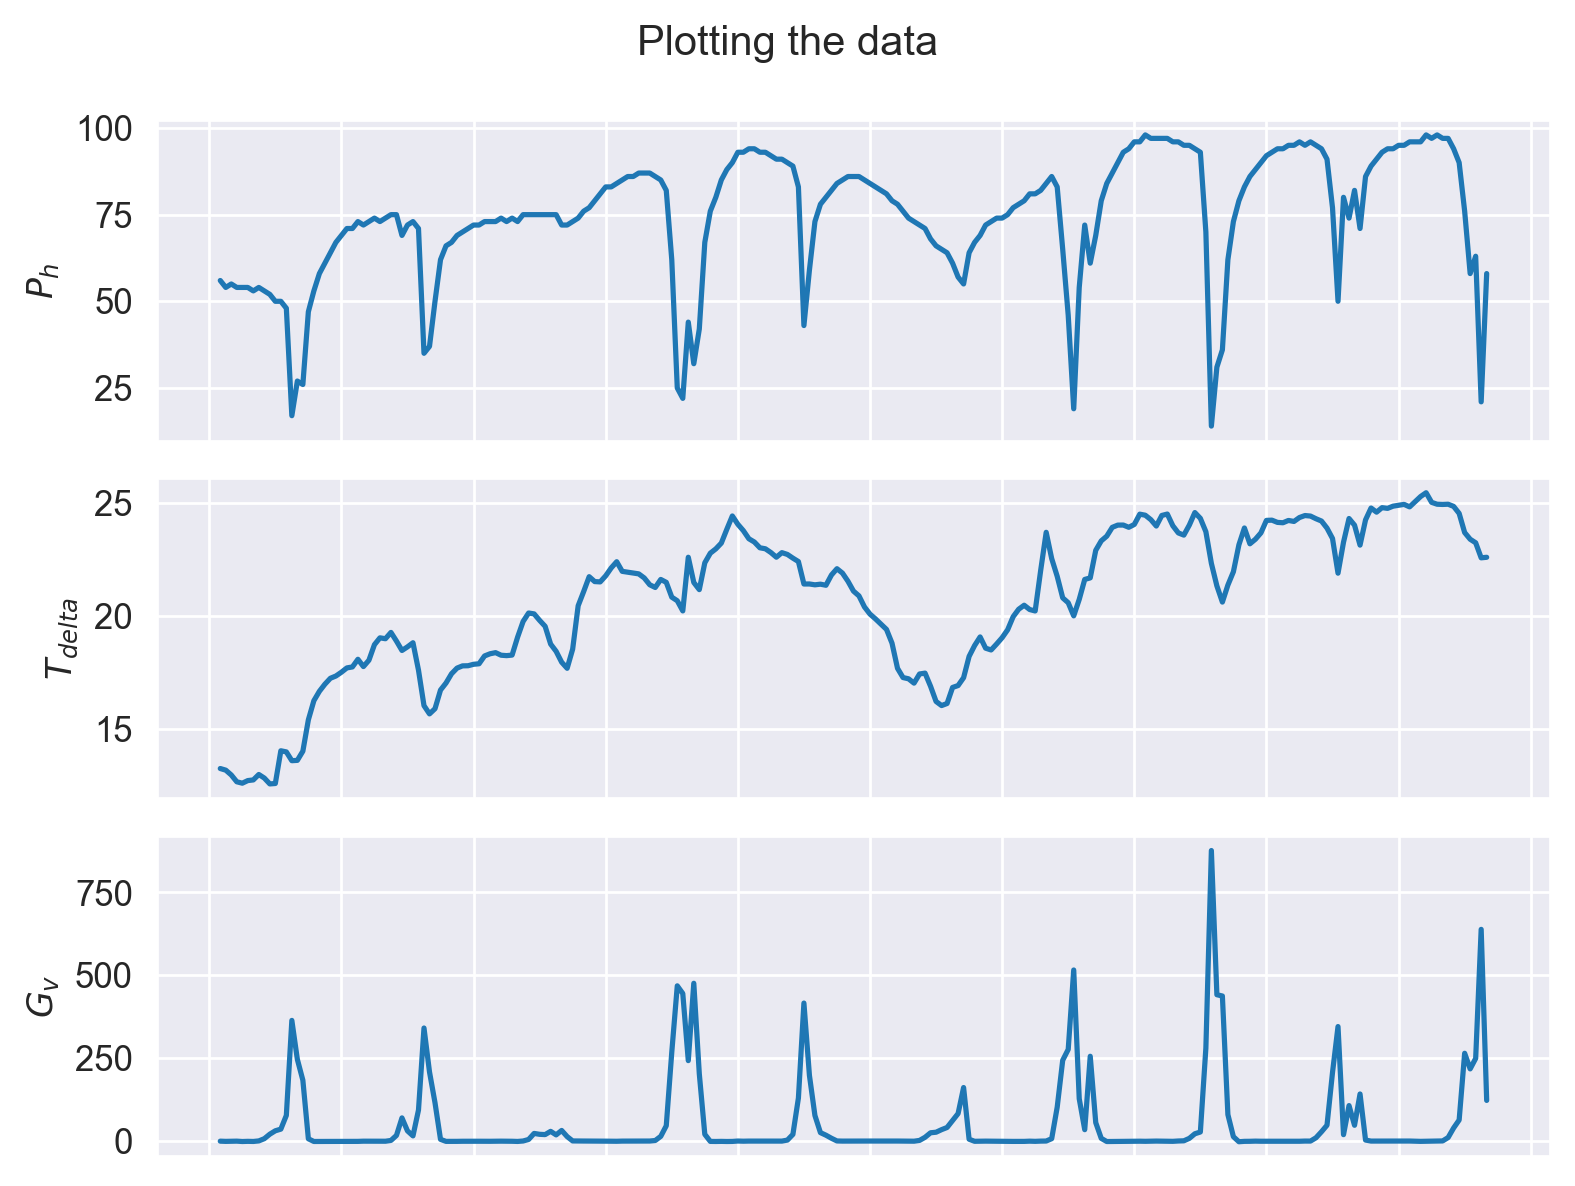

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

fig = plt.figure(dpi=250)
fig.suptitle("Plotting the data")
ax3 = plt.subplot(313)
ax1 = plt.subplot(311, sharex=ax3)
ax2 = plt.subplot(312, sharex=ax3)

ax1.plot(df.Ph)
ax1.set_xticklabels([])
ax1.set_ylabel("$P_h$")

ax2.plot(df.Tdelta)
ax2.set_ylabel("$T_{delta}$")

ax3.plot(df.Gv)
ax3.set_ylabel("$G_v$")

plt.xticks(rotation=45)
plt.tight_layout()

*Comment:*

Clearly there is an inverse relation between $P_h$ and $G_v$, which is just by construction. The peaks of $G_v$ and the drops in $G_v$ conincide, however, not in value magnitude but just in location and relative severity. 

Additionally, the drops are also present in $T_d$, whilst significantly weaker than in $P_h$.

Tracing along all the buckling peaks of $P_h$ and the peaks of $T_d$, one can observe a notion of a correlated moving trendline.

##### 3.2

In [6]:
cutoff = "2013-02-06 00:00"
df_train = df[df.tdate<=cutoff]

##### 3.3 investigate relationships

In [7]:
import numpy as np

# cross correlation - non-commutative but symmetric; time-lagged correlation; convolution
pg = np.correlate(df_train.Ph, df_train.Gv)
pt = np.correlate(df_train.Ph, df_train.Tdelta, mode='full')
gt = np.correlate(df_train.Gv, df_train.Tdelta, mode='same')

# correlation
corr = df_train[['Ph', 'Gv', 'Tdelta']].corr()

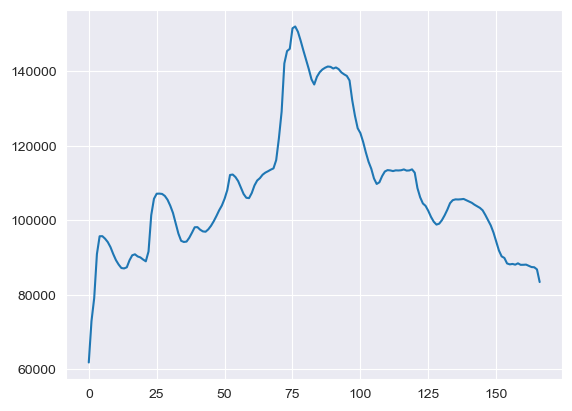

In [8]:
plt.plot(gt)

<Axes: >

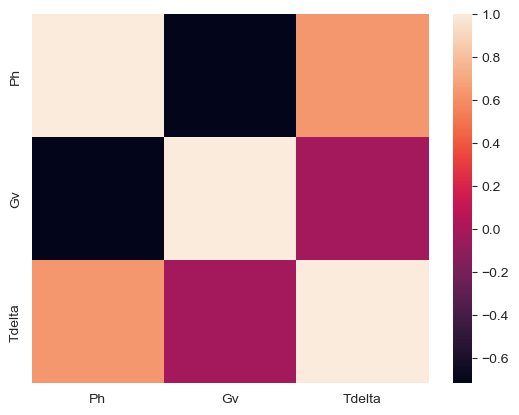

In [9]:
sns.heatmap(corr)

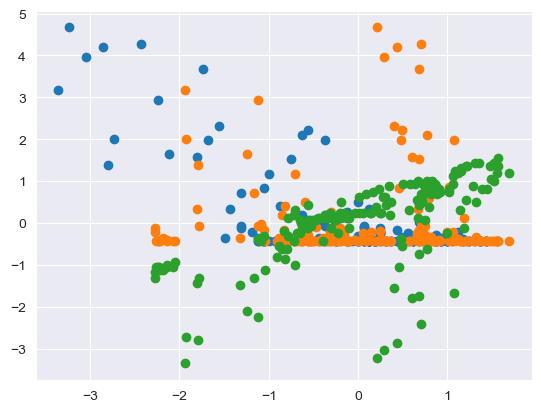

In [16]:
# scatter plots
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.scatter(scaler.fit_transform(df_train.Ph.to_numpy().reshape(-1,1)), scaler.fit_transform(df_train.Gv.to_numpy().reshape(-1,1)))
plt.scatter(scaler.fit_transform(df_train.Tdelta.to_numpy().reshape(-1,1)), scaler.fit_transform(df_train.Gv.to_numpy().reshape(-1,1)))
plt.scatter(scaler.fit_transform(df_train.Tdelta.to_numpy().reshape(-1,1)), scaler.fit_transform(df_train.Ph.to_numpy().reshape(-1,1)))